# Importing modules

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Data Cleaning

### loading & exploring Data

In [371]:
re_df = pd.read_excel('Data_MidTerm_Project_Real_State_Regression.xls')

In [372]:
re_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [373]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

numerical:
'sqft_living', 
'sqft_lot',
'sqft_living15'
'sqft_lot15'
'sqft_above',
'sqft_basement'
'price'

categorical:
bedrooms
bathrooms
floors in integer
waterfront = categorical (yes/no)   = view?
'condition'
'grade'
'yr_built'
'yr_renovated'  = replace 0 with nan 
'zipcode'
'lat'
'long'


### droping columns

In [374]:
re_df.drop(['id'],axis=1, inplace=True)
re_df.drop(['date'],axis=1, inplace=True)
#re_df.drop(['view'],axis=1, inplace=True)
re_df.drop(['yr_renovated'],axis=1, inplace=True)
re_df.drop(['sqft_above'],axis=1, inplace=True)
#re_df.drop(['zipcode'],axis=1, inplace=True)
#re_df.drop(['sqft_basement'],axis=1, inplace=True)

### removing duplicates

In [375]:
re_df.drop_duplicates(inplace=True)

### Replacing null values with nan

The yr_renovated column has more than 20.683 values=0. Does that make sense? .....

In [376]:
#re_df["sqft_basement"].replace(0, np.nan, inplace=True)

#re_df["view"].replace(0, np.nan, inplace=True)
#re_df["view"].value_counts()

In [377]:
#re_df.view.hist()

### droping nan values

In [378]:
#re_df.dropna(inplace=True)
#re_df

### renaming waterfront column features

In [379]:
def clean_waterfront(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'

In [380]:
re_df["waterfront"] = list(map(clean_waterfront,re_df["waterfront"])) 

### changing year renovated

def yr_renovated(x):
    if x == 0:
        return 'no'
    else:
        return 'yes'

In [381]:
#re_df["yr_renovated"] = list(map(yr_renovated,re_df["yr_renovated"]))

### concatinate lat & long

In [382]:
#re_df['location'] = re_df['lat'].astype(str) + "-" + re_df['long'].astype(str)

### removing outliers

#### bedrooms

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

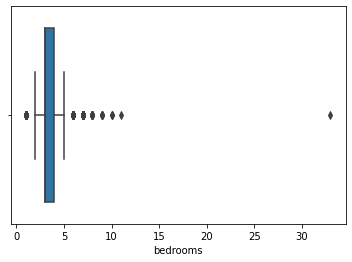

In [383]:
sns.boxplot(re_df['bedrooms'])

Q1 = re_df['bedrooms'].quantile(0.25)
Q3 = re_df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (re_df['bedrooms'] >= Q1 - 1.5 * IQR) & (re_df['bedrooms'] <= Q3 + 1.5 *IQR)
re_df = re_df.loc[filter]

In [384]:
max(re_df['bedrooms'])

33

In [385]:
re_df = re_df[re_df.bedrooms != max(re_df['bedrooms'])]
#re_df = re_df[re_df.bedrooms != 11]

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

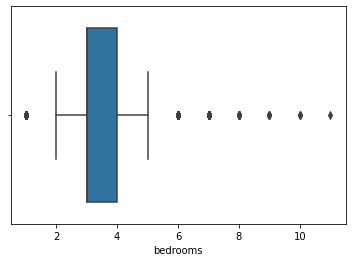

In [386]:
sns.boxplot(re_df['bedrooms'])

In [387]:
re_df['bedrooms'].value_counts()

3     9821
4     6881
2     2759
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

530 rows removed

#### bathrooms

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

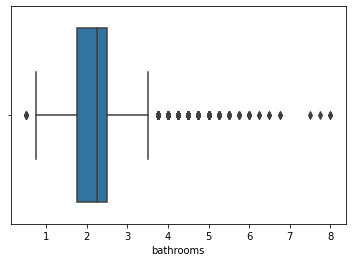

In [388]:
sns.boxplot(re_df['bathrooms'])

Q1 = re_df['bathrooms'].quantile(0.25)
Q3 = re_df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (re_df['bathrooms'] >= Q1 - 1.5 * IQR) & (re_df['bathrooms'] <= Q3 + 1.5 *IQR)
re_df = re_df.loc[filter]

In [389]:
re_df['bathrooms'].value_counts()

re_df = re_df[re_df.bathrooms != max(re_df['bathrooms'])]
#re_df = re_df[re_df.bathrooms != 7.75]
#re_df = re_df[re_df.bathrooms != 6.75]

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

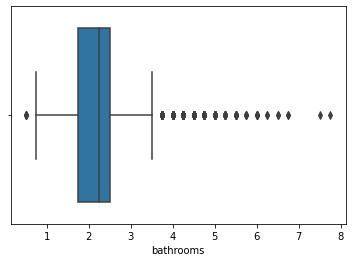

In [390]:
sns.boxplot(re_df['bathrooms'])

In [391]:
Q1 = re_df['sqft_lot'].quantile(0.25)
Q3 = re_df['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (re_df['sqft_lot'] >= Q1 - 1.5 * IQR) & (re_df['sqft_lot'] <= Q3 + 1.5 *IQR)
re_df = re_df.loc[filter]

#### further exploration

In [392]:
#re_df = re_df[re_df.sqft_above != 7420]
re_df["sqft_lot15"].value_counts()

Q1 = re_df["sqft_lot15"].quantile(0.25)
Q3 = re_df["sqft_lot15"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (re_df["sqft_lot15"] >= Q1 - 1.5 * IQR) & (re_df["sqft_lot15"] <= Q3 + 1.5 *IQR)
re_df = re_df.loc[filter]

In [393]:
#re_df = re_df[re_df.sqft_lot15 != 560617]


## Plot the Correlation Heatmap

re_num = re_df[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement']]

corr = re_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [394]:
(re_df['zipcode'])

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 18617, dtype: int64

## Split the Data 

In [395]:
expensive_zipcodes= [98199, 98119, 98109, 98102, 98105, 98112, 98033, 98039, 98004, 98005, 98040, 98006, 98075]
expensive_areas = re_df[re_df['zipcode'].isin(expensive_zipcodes)]

In [396]:
expensive_areas['zipcode'].value_counts()

98006    408
98033    398
98199    314
98112    267
98075    236
98004    229
98105    225
98040    201
98119    184
98109    109
98005    108
98102    102
98039     17
Name: zipcode, dtype: int64

In [397]:
affordable_areas = re_df[~re_df['zipcode'].isin(expensive_zipcodes)]

In [398]:
affordable_areas['zipcode'].value_counts()

98103    601
98115    579
98117    552
98052    518
98034    515
        ... 
98010     41
98077     34
98014     32
98024     22
98070     17
Name: zipcode, Length: 57, dtype: int64

## X Y split

In [399]:
X=expensive_areas.drop("price", axis=1)
y=expensive_areas["price"]

## Data Splitting

In [400]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [401]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Data Transformation

### Hot coding Categorical Variables

In [402]:
X_train_cat=X_train[['bedrooms','bathrooms','view','floors','waterfront','condition','grade','yr_built','zipcode','lat','long']]
X_train_cat

X_test_cat=X_test[['bedrooms','bathrooms','view','floors','waterfront','condition','grade','yr_built','zipcode','lat','long']]
X_test_cat

,bedrooms,bathrooms,view,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
16193,4,2.00,0,2.0,no,3,8,1901,98119,47.6513,-122.368
11152,3,2.25,0,1.5,no,4,7,1921,98105,47.6683,-122.286
7619,5,3.00,0,1.0,no,4,8,1971,98006,47.5696,-122.127
13421,3,1.00,0,2.0,no,3,8,1905,98102,47.6363,-122.320
1552,4,2.25,0,2.0,no,4,10,1968,98040,47.5318,-122.224
...,...,...,...,...,...,...,...,...,...,...,...
14000,4,2.25,0,2.0,no,4,9,1907,98112,47.6275,-122.308
19509,4,2.00,0,1.0,no,4,6,1949,98033,47.6859,-122.166
2207,5,2.25,2,1.0,no,5,8,1958,98199,47.6456,-122.389
15354,3,1.75,0,1.0,no,4,8,1958,98005,47.5857,-122.172


In [403]:
X_train_cat=pd.get_dummies(X_train_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_train_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names(input_features=X_train_cat.columns))

X_test_cat=pd.get_dummies(X_test_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_test_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names(input_features=X_test_cat.columns))

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bathrooms_1.0,...,long_-121.982,long_-121.981,long_-121.98,long_-121.978,long_-121.976,long_-121.974,long_-121.973,long_-121.972,long_-121.97,waterfront_yes_1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [404]:
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

### Standardize numerical

In [405]:
X_train_num=X_train[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]
X_train_num

X_test_num=X_test[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]
X_test_num

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_basement
16193,2750,5527,1290,1764,620
11152,1720,4000,1410,4000,270
7619,2500,11779,2580,12055,950
13421,1580,4000,2190,4000,0
1552,2360,11523,2850,11362,0
...,...,...,...,...,...
14000,3780,5160,2740,5160,1270
19509,2120,7806,1560,9920,350
2207,2960,7680,2860,7680,1410
15354,1690,8190,1840,8705,0


In [406]:
std_scaler=StandardScaler().fit(X_train_num)   ## finding the parameters (mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train_num)

In [407]:
X_test_scaled=std_scaler.transform(X_test_num)

In [408]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-1.46566167 -0.08352838 -1.06927119 -0.41321926 -0.82803113]
 [ 0.6676496   0.86967578  1.40655092  0.76398424  1.50971437]
 [ 0.39364632 -1.38066416 -0.44677877 -1.74680617 -0.82803113]
 ...
 [ 0.1098572  -0.654154   -1.04097608 -0.70174953 -0.82803113]
 [-0.91765511  0.09881244 -1.11171385  0.69185168  0.18499192]
 [-0.31093355 -0.39477872 -1.05512364 -0.41321926  1.25645861]]
--------
[[ 0.28600217 -0.51746323 -1.43710762 -1.63543349  0.37980405]
 [-0.72193848 -0.91352928 -1.26733696 -0.9902798  -0.30203839]
 [ 0.04135638  1.10415104  0.38792697  1.33383153  1.02268406]
 ...
 [ 0.49150463  0.04097176  0.78405851  0.07151159  1.91881984]
 [-0.75129597  0.17325315 -0.6589921   0.36725512 -0.82803113]
 [-0.0467161   0.52574416 -0.30530322  0.61077467  0.39928526]]


In [409]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train_num.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test_num.columns)

In [410]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)

### Quantile Transformer

qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled['sqft_living15'].to_numpy().reshape(-1,1))
X_train_scaled['sqft_living15'] = qt.transform(X_train_scaled['sqft_living15'].to_numpy().reshape(-1,1))
X_test_scaled['sqft_living15'] = qt.transform(X_test_scaled['sqft_living15'].to_numpy().reshape(-1,1))
sns.displot(sqft_living15)

qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled['sqft_lot15'].to_numpy().reshape(-1,1))
X_train_scaled['sqft_lot15'] = qt.transform(X_train_scaled['sqft_lot15'].to_numpy().reshape(-1,1))
X_test_scaled['sqft_lot15'] = qt.transform(X_test_scaled['sqft_lot15'].to_numpy().reshape(-1,1))
sns.displot(sqft_lot15)

qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled['sqft_above'].to_numpy().reshape(-1,1))
X_train_scaled['sqft_above'] = qt.transform(X_train_scaled['sqft_above'].to_numpy().reshape(-1,1))
X_test_scaled['sqft_above'] = qt.transform(X_test_scaled['sqft_above'].to_numpy().reshape(-1,1))
sns.displot(sqft_above)

## Concatination 

In [411]:
X_train_con=pd.concat([X_train_scaled,X_train_cat],axis=1)
X_test_con=pd.concat([X_test_scaled,X_test_cat],axis=1)

In [412]:
X_train_con

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_basement,bedrooms,bathrooms,view,floors,condition,grade,yr_built,zipcode,lat,long,waterfront_yes
0,-1.465662,-0.083528,-1.069271,-0.413219,-0.828031,2,1.50,0,1.0,3,7,1910,98199,47.6490,-122.403,0
1,0.667650,0.869676,1.406551,0.763984,1.509714,4,2.00,1,1.0,3,7,1939,98199,47.6656,-122.406,0
2,0.393646,-1.380664,-0.446779,-1.746806,-0.828031,4,3.50,0,3.0,3,10,2013,98102,47.6262,-122.323,0
3,-0.330505,-0.550404,-0.359064,-0.413219,1.236977,4,1.75,0,1.0,4,8,1941,98199,47.6501,-122.395,0
4,1.881093,1.920146,2.835454,2.077663,-0.828031,5,3.50,0,2.0,3,11,2003,98075,47.5848,-121.969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0.197930,0.315131,1.378256,0.389760,1.490233,5,2.75,4,1.0,5,8,1969,98006,47.5667,-122.155,0
1954,-0.066288,0.091550,2.000748,0.474011,-0.029301,3,2.25,1,1.0,3,10,1948,98105,47.6515,-122.278,0
1955,0.109857,-0.654154,-1.040976,-0.701750,-0.828031,3,2.50,0,2.0,3,11,1984,98102,47.6295,-122.320,0
1956,-0.917655,0.098812,-1.111714,0.691852,0.184992,3,1.50,0,1.0,4,7,1955,98006,47.5659,-122.141,0


##  Apply Linear Regression

### Modelling using Statsmodels

In [413]:
X_train_const_scaled = sm.add_constant(X_train_con) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_con) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     367.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:01:21   Log-Likelihood:                -26811.
No. Observations:                1958   AIC:                         5.366e+04
Df Residuals:                    1941   BIC:                         5.375e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.106e+07   1.19e+07     -6.

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [414]:
predictions_test

0      1.041485e+06
1      6.833018e+05
2      6.891116e+05
3      7.528358e+05
4      9.874115e+05
           ...     
835    1.335734e+06
836    5.865466e+05
837    1.034128e+06
838    6.631347e+05
839    7.945552e+05
Length: 840, dtype: float64

In [415]:
#display adjusted R-squared
print(model.rsquared_adj)

0.749528417276174


### Modeling using Scikit Learn

In [416]:
model=LinearRegression()    # model
model.fit(X_train_con, y_train)   # model train

LinearRegression()

In [417]:
model.coef_

array([ 3.00641025e+05,  1.01461771e+04,  4.45243302e+04, -1.14551389e+03,
       -7.30631475e+04, -3.98774073e+04,  5.07418302e+04,  3.30933608e+04,
       -4.71123481e+04,  2.87002311e+04,  7.59457139e+04, -1.69265391e+03,
       -1.72045650e+03,  8.79968964e+05, -1.72975844e+06,  8.07069471e+05])

In [418]:
model.intercept_

-81062341.6293295

Making prediction

In [419]:
y_pred=model.predict(X_test_con)   # model prediction
##y_pred_train=model.predict(X_train_scaled)

In [420]:
y_test

0       865000
1       620000
2       730000
3       690000
4       957500
        ...   
835    1400000
836     500000
837    1050000
838     530000
839     758000
Name: price, Length: 840, dtype: int64

In [421]:
y_pred

array([1041485.10263756,  683301.8328051 ,  689111.56262934,
        752835.84888342,  987411.54395902,  628742.30160595,
        959092.53433201,  587086.98826849, 1171999.20873562,
       1637774.47739154,  844952.87675661,  490402.96831444,
        711651.92582306,  689964.15199491,  853587.54773894,
        573903.58407599,  840671.95359972, 1230846.17266804,
        964167.51360059,  841747.20361277,  921318.19503766,
        434242.19219053,  905465.71939737,  783144.1839821 ,
       1747656.62236983,  490502.71234968, 1011068.41019072,
        589744.81915614,  874633.35282192,  530339.08896902,
       1660155.73057219,  629029.30049351,  601312.9093312 ,
        863407.86822891,  621836.63884169,  978071.28832978,
        454267.61122264, 1108796.28740963,  656961.13894913,
       1362816.99823394,  645722.47753882,  421125.96735755,
       1004441.18680881, 1081938.72702098,  642419.72090331,
        437356.10349672,  852806.61925535,  525108.982859  ,
       1268832.38068306,

In [422]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
0,865000,1.041485e+06
1,620000,6.833018e+05
2,730000,6.891116e+05
3,690000,7.528358e+05
4,957500,9.874115e+05
...,...,...
835,1400000,1.335734e+06
836,500000,5.865466e+05
837,1050000,1.034128e+06
838,530000,6.631347e+05


Linear Regression Train-test split. Standardize the data (after the data split). Apply linear regression. Model Interpretation. Model Validation Model Evaluation: MSE. RMSE. MAE. R2. Adjusted R2. Feature Importance.

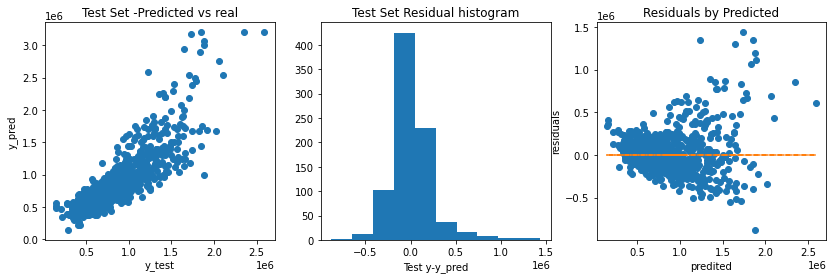

In [423]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics

In [424]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

58218473365.24667
162141.82052303856


In [425]:
R2=r2_score(y_test,y_pred)
R2

0.7097667253185571

In [426]:
X_test.shape[1]

16

In [427]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7041242801242642

#### Feature Importance

In [428]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_con.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance')

In [429]:
features_importances

,Attribute,Importance
3,sqft_lot15,1.145514e+03
11,yr_built,1.692654e+03
12,zipcode,1.720456e+03
1,sqft_lot,1.014618e+04
9,condition,2.870023e+04
7,view,3.309336e+04
5,bedrooms,3.987741e+04
2,sqft_living15,4.452433e+04
8,floors,4.711235e+04
6,bathrooms,5.074183e+04


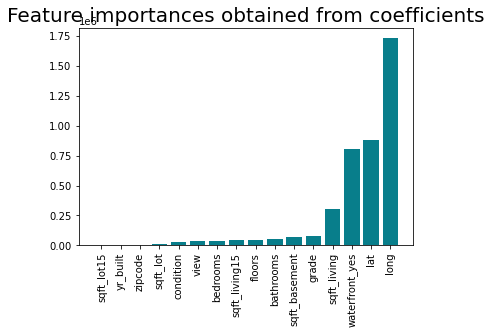

In [430]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Evaluating predictions

In [431]:
# MAE: mean absolute error
MAE = np.mean( np.abs( y_test - y_pred ) )
MAE

162141.8205230385

In [432]:
# MSE: mean squared error
MSE = np.mean( np.power( y_test - y_pred , 2 ) )
MSE

58218473365.24661

In [433]:
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
RMSE

241285.04587986096

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

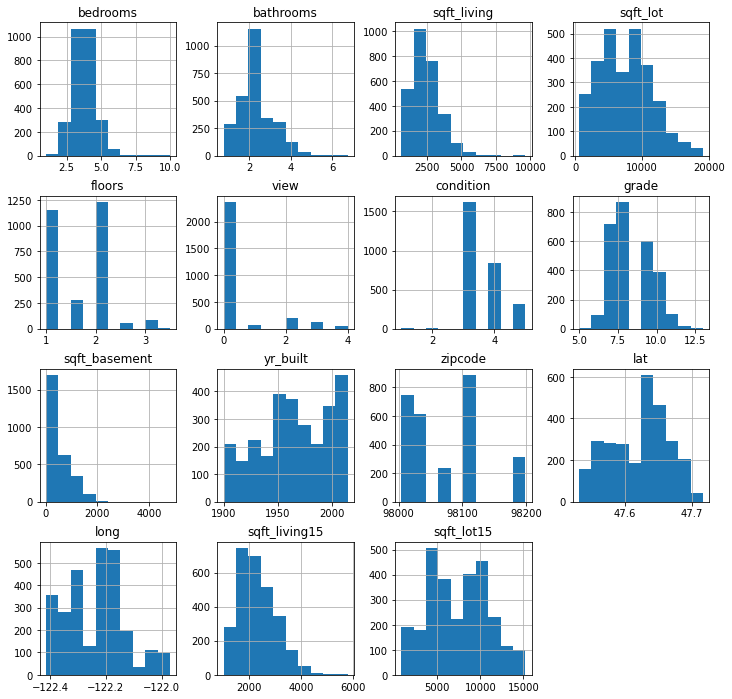

In [434]:
X.hist(figsize=(12,12))